# yt-dev

# 3/24/17

Ok, important commits to remember: 
- 398bded. This commit was before any of the new unstructured mesh element work
- f3015d6. This commit was before the netcdf4 memory leak stuff was added

- No mesh tests were skipped for the **last** build and test run of the NetCDF4 PR

Ok, here's an account of `test_mesh_render` tests (LHS: py35 build number, RHS: number of tests run)
- 1337: **4**
- 1338: 20
- 1339: 20
- 1340: 20
- 1341: 20
- 1342: 20
- 1343: 20
- 1344: 20
- 1345: 20 (First build and test of Alex's PR 2542)
- 1346: 2 (Britton Smith test PR 2541)
- 1347: 20 (PR 2543 Nathan)
- 1348: 20 (PR 2543 Nathan)
- 1349: 20 (PR 2543 Nathan)
- 1350: 20 (PR 2544 Nathan)
- 1351: 20 (PR 2544 Nathan)
- 1352: 4 (PR 2541 Britton)
- 1353: 20 (PR 2545 Nathan)
- 1354: 4 (PR 2542 Alex)
- 1355: 4 (PR 2542 Alex)
- 1356: 20 (PR 2542 Alex)

## 2/16/17

Let's take T2Sampler2D for example. It is called in `pixelization_routines.pyx` by the `pixelize_element_mesh` function. The `pixelize_element_mesh` function is called in `cartesian_coordinates.py` by the `pixelize` function of the `CartesianCoordinateHandler` class. Here is backtrace for call to `pixelize` when asking for a `SlicePlot` from an exodus data set:
```
slc = yt.SlicePlot(ds, 'z', ('all','group1_lin'), origin="native")
  /home/al007/yt/yt/visualization/plot_window.py(2017) SlicePlot()
-> return AxisAlignedSlicePlot(ds, normal, fields, *args, **kwargs)
  /home/al007/yt/yt/visualization/plot_window.py(1334) AxisAlignedSlicePlot.__init__()
-> PWViewerMPL.__init__()
  /home/al007/yt/yt/visualization/plot_window.py(670) PWViewerMPL.__init__()
-> PlotWindow.__init__(self, *args, **kwargs)
  /home/al007/yt/yt/visualization/plot_window.py(223) PlotWindow.__init__()
-> self._setup_plots()
  /home/al007/yt/yt/visualization/plot_window.py(758) PWViewerMPL._setup_plots()
-> self._recreate_frb()
  /home/al007/yt/yt/visualization/plot_window.py(282) PlotWindow._recreate_frb()
-> self._frb._get_data_source_fields()
  /home/al007/yt/yt/visualization/fixed_resolution.py(156) FixedResolutionBuffer._get_data_source_fields()
-> self[f]
  /home/al007/yt/yt/visualization/fixed_resolution.py(135) FixedResolutionBuffer.__getitem__()
-> buff = self.ds.coordinates.pixelize(...)
> /home/al007/yt/yt/geometry/coordinates/cartesian_coordinates.py(68) CartesianCoordinatehandler.pixelize()
-> index = data_source.ds.index
```

Inheritance pattern for some of this plotting stuff:

AxisAlignedSlicePlot <- PWViewerMPL <- PlotWindow <- ImagePlotContainer <- object

WindowPlotMPL <- ImagePlotMPL <- PlotMPL <- object

In [ ]:
import numpy as np

start_point = np.array([1, 1, 1])
end_point = np.array([2, 3, 4])
resolution = 10
lin_sample_points = np.zeros((resolution + 1, 3))
arc_length = np.zeros(resolution + 1)

lin_vec = end_point - start_point
lin_length = np.linalg.norm(lin_vec)
lin_inc = lin_vec / resolution
inc_length = np.linalg.norm(lin_inc)
lin_sample_points[0] = start_point
arc_length[0] = 0
for i in range(1, resolution + 1):
    lin_sample_points[i] = lin_sample_points[i-1] + lin_inc
    arc_length[i] = arc_length[i-1] + inc_length

print(lin_sample_points)
print(arc_length)

In [ ]:
print(lin_length)

# 2/17/17

yt : [WARNING  ] 2017-02-17 19:49:16,061 name_glo_var not found
yt : [WARNING  ] 2017-02-17 19:49:16,187 name_elem_var not found
yt : [INFO     ] 2017-02-17 19:49:16,189 Loading coordinates
yt : [INFO     ] 2017-02-17 19:49:16,192 Loading connectivity
yt : [INFO     ] 2017-02-17 19:49:16,205 Parameters: current_time              = 10000.0
yt : [INFO     ] 2017-02-17 19:49:16,205 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-02-17 19:49:16,207 Parameters: domain_left_edge          = [ -0.573 -11.5     0.   ]
yt : [INFO     ] 2017-02-17 19:49:16,210 Parameters: domain_right_edge         = [   6.303  126.5      1.   ]
yt : [INFO     ] 2017-02-17 19:49:16,211 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-02-17 19:49:16,213 Loading coordinates
yt : [INFO     ] 2017-02-17 19:49:16,215 Loading connectivity
yt : [WARNING  ] 2017-02-17 19:49:16,219 name_elem_var not found


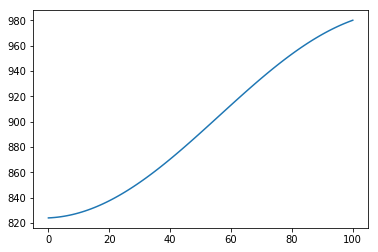

In [2]:
data_dir = "/home/lindsayad/Dropbox/moltres_output/"
import yt
ds = yt.load(data_dir + "020617_mod_heat_source_one_minus_beta_fission.e", step=-1)

from yt.geometry.coordinates.cartesian_coordinates import CartesianCoordinateHandler

handler = CartesianCoordinateHandler(ds)

arc_length, temp_values = handler.line_plot(('all', 'temp'), np.array([1., 0., 0.]), np.array([1., 100., 0.]), 100)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(arc_length, temp_values)
plt.show()

In [3]:
if not False and True:
    print("Hey")

Hey


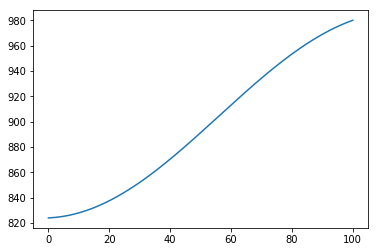

In [3]:
arc_length, temp_values = handler.line_plot([('all', 'temp')], np.array([1., 0., 0.]), np.array([1., 100., 0.]), 10000)
plt.plot(arc_length, temp_values)
plt.show()

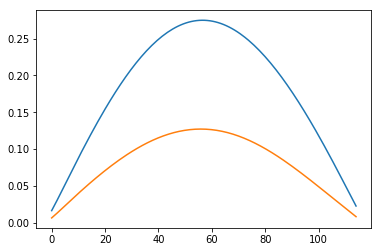

In [5]:
arc_length, group1_values = handler.line_plot([('all', 'group1_lin')], np.array([0., 0., 0.]), np.array([0., 114., 0.]), 10000)
arc_length, group2_values = handler.line_plot([('all', 'group2_lin')], np.array([0., 0., 0.]), np.array([0., 114., 0.]), 10000)
plt.plot(arc_length, group1_values, arc_length, group2_values)
plt.show()

In [6]:
r = (1, 1, 1)

In [7]:
x, y, z = r

In [8]:
print(x, y, z)

1 1 1


# 3/1/17

Important python knowledge gained today. See code below

In [1]:
class MyNumber():
    def __init__(self):
        self.a = 2
        
    def change_loc(self):
        a = self.a
        a = 3

mynumber = MyNumber()
mynumber.change_loc()
print(mynumber.a)

class MyList():
    def __init__(self):
        self.a = [2, 3, 4, 5]
        
    def change_loc(self):
        a = self.a
        a[0] = 3    

l = MyList()
l.change_loc()
print(l.a)

2
[3, 3, 4, 5]


As you can see, when the class variable is an int, a local variable that gets defined equal to the class variable is copied. However, if the class variable is a list, then the local variable becomes an alias for the same location in memory as the class variable. Thus a modification to the local variable for type int does not change the class variable, but modifying the local variable when its an alias does modify the class variable. Good to know! That's why for an `ExodusSimulation` object, it can't be iterated over until the `get_time_series()` method has been called.

# 3/8/17

In [8]:
files = []
for x in range(990):
    files.append(open('foo.txt', 'w'))

OSError: [Errno 24] Too many open files: 'foo.txt'

In [9]:
pwd

'/home/lindsayad/jupyter_notebooks'

In [12]:
import yt
yt.load("test.e")

yt : [ERROR    ] 2017-03-08 11:29:07,251 Couldn't figure out output type for test.e


YTOutputNotIdentified: Supplied ('test.e',) {}, but could not load!

In [11]:
for f in files:
    f.close()

In [13]:
yt.load("simple_diffusion_out.e")

yt : [WARNING  ] 2017-03-08 11:30:31,869 name_glo_var not found
yt : [WARNING  ] 2017-03-08 11:30:31,883 name_elem_var not found
yt : [INFO     ] 2017-03-08 11:30:31,884 Loading coordinates
yt : [INFO     ] 2017-03-08 11:30:31,885 Loading connectivity
yt : [INFO     ] 2017-03-08 11:30:31,890 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-08 11:30:31,891 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-08 11:30:31,892 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-08 11:30:31,892 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-08 11:30:31,893 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-08 11:30:31,894 Loading coordinates
yt : [INFO     ] 2017-03-08 11:30:31,895 Loading connectivity
yt : [WARNING  ] 2017-03-08 11:30:31,896 name_elem_var not found


simple_diffusion_out.e

In [ ]:
import yt

sim = yt.simulation("test_dir", "ExodusII")

sim.get_time_series()

yt : [INFO     ] 2017-03-08 15:06:55,070 Checking 1025 potential outputs.
yt : [WARNING  ] 2017-03-08 15:06:55,080 name_glo_var not found
yt : [WARNING  ] 2017-03-08 15:06:55,098 name_elem_var not found
yt : [INFO     ] 2017-03-08 15:06:55,099 Loading coordinates
yt : [INFO     ] 2017-03-08 15:06:55,100 Loading connectivity
yt : [INFO     ] 2017-03-08 15:06:55,106 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-08 15:06:55,107 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-08 15:06:55,108 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-08 15:06:55,109 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-08 15:06:55,109 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-08 15:06:55,110 Loading coordinates
yt : [INFO     ] 2017-03-08 15:06:55,112 Loading connectivity
yt : [WARNING  ] 2017-03-08 15:06:55,114 name_elem_var not found
yt : [WARNING  ] 2017-03-08 15:06

In [15]:
from contextlib import contextmanager

class File():
    def __init__(self, filename):
        self.filename = filename
        
    @contextmanager
    def open_file():
        the_file = open(self.filename)
        yield the_file
        the_file.close()

In [16]:
from netCDF4 import Dataset

In [17]:
ds = Dataset("simple_diffusion_out.e")

In [18]:
ds.variables

OrderedDict([('time_whole', <class 'netCDF4._netCDF4.Variable'>
              float64 time_whole(time_step)
              unlimited dimensions: time_step
              current shape = (2,)
              filling off), ('eb_status', <class 'netCDF4._netCDF4.Variable'>
              int32 eb_status(num_el_blk)
              unlimited dimensions: 
              current shape = (1,)
              filling off), ('eb_prop1', <class 'netCDF4._netCDF4.Variable'>
              int32 eb_prop1(num_el_blk)
                  name: ID
              unlimited dimensions: 
              current shape = (1,)
              filling off), ('ns_status', <class 'netCDF4._netCDF4.Variable'>
              int32 ns_status(num_node_sets)
              unlimited dimensions: 
              current shape = (4,)
              filling off), ('ns_prop1', <class 'netCDF4._netCDF4.Variable'>
              int32 ns_prop1(num_node_sets)
                  name: ID
              unlimited dimensions: 
              current 

In [25]:
class NetCDF4FileHandler():
    def __init__(self, filename):
        self.filename = filename
        
    @contextmanager
    def open_ds(self):
        ds = Dataset(self.filename)
        yield ds
        ds.close()

In [26]:
handler = NetCDF4FileHandler("simple_diffusion_out.e")

variables = handler.open_ds().variables

AttributeError: '_GeneratorContextManager' object has no attribute 'variables'

In [27]:
handler.open_ds()

In [1]:
import yt

ds = yt.load("simple_diffusion_out.e", step=-1)

yt : [WARNING  ] 2017-03-08 14:07:12,092 name_glo_var not found
yt : [WARNING  ] 2017-03-08 14:07:12,108 name_elem_var not found
yt : [INFO     ] 2017-03-08 14:07:12,110 Loading coordinates
yt : [INFO     ] 2017-03-08 14:07:12,111 Loading connectivity
yt : [INFO     ] 2017-03-08 14:07:12,117 Parameters: current_time              = 1.0
yt : [INFO     ] 2017-03-08 14:07:12,117 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-08 14:07:12,118 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-08 14:07:12,119 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-08 14:07:12,120 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-08 14:07:12,121 Loading coordinates
yt : [INFO     ] 2017-03-08 14:07:12,122 Loading connectivity
yt : [WARNING  ] 2017-03-08 14:07:12,124 name_elem_var not found


In [2]:
slc = yt.SlicePlot(ds, 'z', ('all', 'u'))

yt : [INFO     ] 2017-03-08 14:08:14,861 xlim = -0.100000 1.100000
yt : [INFO     ] 2017-03-08 14:08:14,862 ylim = -0.100000 1.100000
yt : [INFO     ] 2017-03-08 14:08:14,863 xlim = -0.100000 1.100000
yt : [INFO     ] 2017-03-08 14:08:14,864 ylim = -0.100000 1.100000
yt : [INFO     ] 2017-03-08 14:08:14,871 Making a fixed resolution buffer of (('all', 'u')) 800 by 800



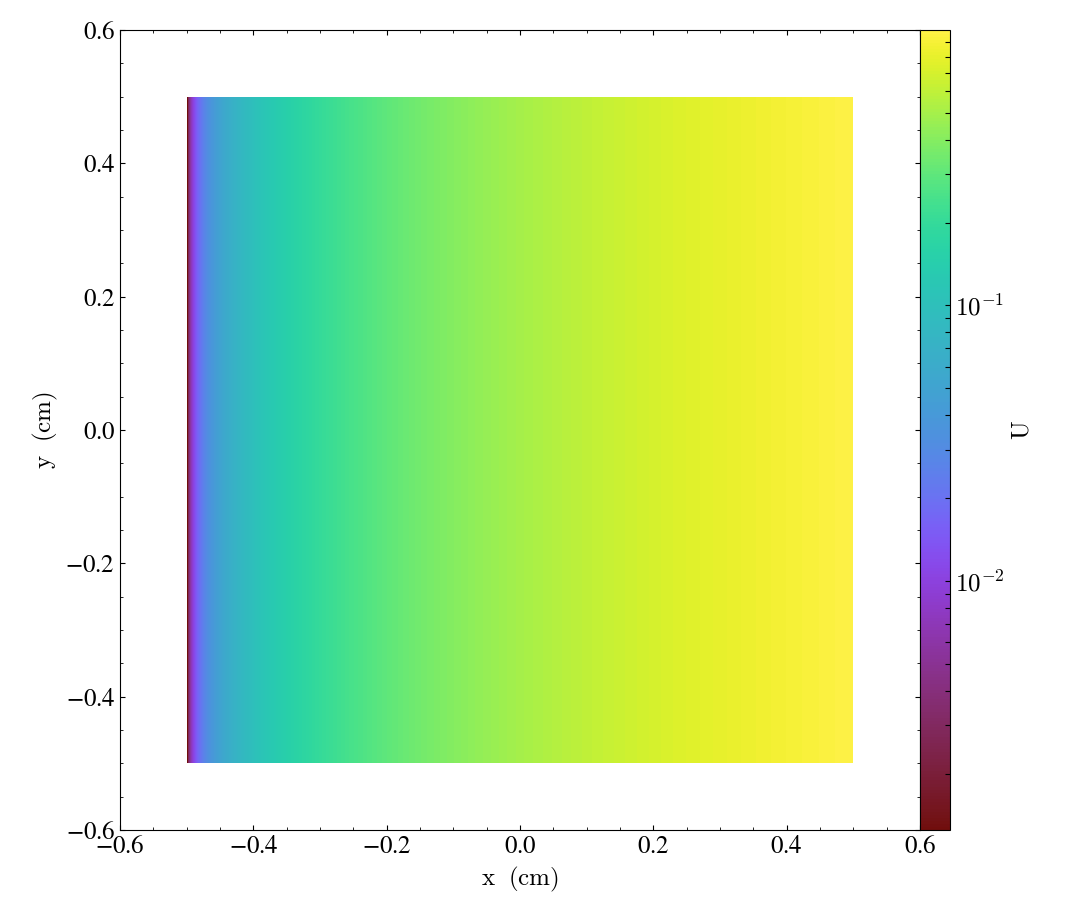

In [3]:
slc.show()

In [33]:
with handler.open_ds() as ds:
    variables = ds.variables
    print(variables)
    dimension = variables['coor_names'].shape[0]
    print(dimension)
    
print(dimension)
print(variables)

OrderedDict([('time_whole', <class 'netCDF4._netCDF4.Variable'>
float64 time_whole(time_step)
unlimited dimensions: time_step
current shape = (2,)
filling off
), ('eb_status', <class 'netCDF4._netCDF4.Variable'>
int32 eb_status(num_el_blk)
unlimited dimensions: 
current shape = (1,)
filling off
), ('eb_prop1', <class 'netCDF4._netCDF4.Variable'>
int32 eb_prop1(num_el_blk)
    name: ID
unlimited dimensions: 
current shape = (1,)
filling off
), ('ns_status', <class 'netCDF4._netCDF4.Variable'>
int32 ns_status(num_node_sets)
unlimited dimensions: 
current shape = (4,)
filling off
), ('ns_prop1', <class 'netCDF4._netCDF4.Variable'>
int32 ns_prop1(num_node_sets)
    name: ID
unlimited dimensions: 
current shape = (4,)
filling off
), ('ss_status', <class 'netCDF4._netCDF4.Variable'>
int32 ss_status(num_side_sets)
unlimited dimensions: 
current shape = (4,)
filling off
), ('ss_prop1', <class 'netCDF4._netCDF4.Variable'>
int32 ss_prop1(num_side_sets)
    name: ID
unlimited dimensions: 
current

RuntimeError: NetCDF: Not a valid ID

In [31]:
print(variables)

RuntimeError: NetCDF: Not a valid ID

# 3/10/17

In [1]:
cd /home/lindsayad/projects/moose/test/tests/kernels/simple_transient_diffusion/gold

/home/lindsayad/projects/moose/test/tests/kernels/simple_transient_diffusion/gold


In [2]:
%run animate.py

yt : [WARNING  ] 2017-03-10 09:58:33,342 name_glo_var not found
yt : [WARNING  ] 2017-03-10 09:58:33,357 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:58:33,358 Loading coordinates
yt : [INFO     ] 2017-03-10 09:58:33,359 Loading connectivity
yt : [INFO     ] 2017-03-10 09:58:33,365 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 09:58:33,365 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-10 09:58:33,366 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-10 09:58:33,367 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-10 09:58:33,368 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-10 09:58:33,369 Loading coordinates
yt : [INFO     ] 2017-03-10 09:58:33,370 Loading connectivity
yt : [WARNING  ] 2017-03-10 09:58:33,371 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:58:33,494 xlim = -0.100000 1.100000
yt : [INFO     ] 2017-03-10 09:58:33,495

> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(253)saving()
-> self.setup(*args, **kw)
(Pdb) c


yt : [WARNING  ] 2017-03-10 09:58:37,461 name_glo_var not found
yt : [WARNING  ] 2017-03-10 09:58:37,487 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:58:37,488 Loading coordinates
yt : [INFO     ] 2017-03-10 09:58:37,489 Loading connectivity
yt : [INFO     ] 2017-03-10 09:58:37,494 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 09:58:37,495 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-10 09:58:37,496 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-10 09:58:37,497 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-10 09:58:37,498 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-10 09:58:37,499 Loading coordinates
yt : [INFO     ] 2017-03-10 09:58:37,501 Loading connectivity
yt : [WARNING  ] 2017-03-10 09:58:37,503 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:58:37,592 Making a fixed resolution buffer of (('all', 'u')) 800 by 800
yt :

ValueError: Invalid file object: <_io.BufferedReader name=64>

In [1]:
cd /home/lindsayad/yt_data

/home/lindsayad/yt_data


In [5]:
import yt
from matplotlib.animation import FuncAnimation
from matplotlib import rc_context

ts = yt.load('GasSloshingLowRes/sloshing_low_res_hdf5_plt_cnt_*')

plot = yt.SlicePlot(ts[0], 'z', 'density')
plot.set_zlim('density', 8e-29, 3e-26)

fig = plot.plots['density'].figure

# animate must accept an integer frame number. We use the frame number
# to identify which dataset in the time series we want to load

def animate(i):
    ds = ts[i]
    plot._switch_ds(ds)

animation = FuncAnimation(fig, animate, frames=len(ts))

# Override matplotlib's defaults to get a nicer looking font
with rc_context({'mathtext.fontset': 'stix'}):
    animation.save('animation.mp4', dpi=110)

yt : [INFO     ] 2017-03-10 11:23:16,088 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 11:23:16,089 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2017-03-10 11:23:16,090 Parameters: domain_left_edge          = [ -3.08560000e+24  -3.08560000e+24  -3.08560000e+24]
yt : [INFO     ] 2017-03-10 11:23:16,090 Parameters: domain_right_edge         = [  3.08560000e+24   3.08560000e+24   3.08560000e+24]
yt : [INFO     ] 2017-03-10 11:23:16,091 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2017-03-10 11:23:16,702 xlim = -3085599999999999991611392.000000 3085599999999999991611392.000000
yt : [INFO     ] 2017-03-10 11:23:16,702 ylim = -3085599999999999991611392.000000 3085599999999999991611392.000000
yt : [INFO     ] 2017-03-10 11:23:16,703 xlim = -3085599999999999991611392.000000 3085599999999999991611392.000000
yt : [INFO     ] 2017-03-10 11:23:16,704 ylim = -3085599999999999991611392.000000 3085599999999999991611392.000000
yt : [INFO   

> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(947)save()
-> if dpi is None:
(Pdb) p dpi
110
(Pdb) n
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(949)save()
-> if dpi == 'figure':
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(952)save()
-> if codec is None:
(Pdb) n
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(953)save()
-> codec = rcParams['animation.codec']
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(955)save()
-> if bitrate is None:
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(956)save()
-> bitrate = rcParams['animation.bitrate']
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(958)save()
-> all_anim = [self]
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(959)save()
-> if ex

yt : [INFO     ] 2017-03-10 11:25:51,513 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 11:25:51,514 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2017-03-10 11:25:51,515 Parameters: domain_left_edge          = [ -3.08560000e+24  -3.08560000e+24  -3.08560000e+24]
yt : [INFO     ] 2017-03-10 11:25:51,517 Parameters: domain_right_edge         = [  3.08560000e+24   3.08560000e+24   3.08560000e+24]
yt : [INFO     ] 2017-03-10 11:25:51,518 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2017-03-10 11:25:51,522 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1006)save()
-> for anim in all_anim:
(Pdb) n
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1009)save()
-> for data in zip(*[a.new_saved_frame_seq()
(Pdb) n
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1010)save()
-> for a in all_anim]):
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1011)save()
-> for anim, d in zip(all_anim, data):
(Pdb) n
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1013)save()
-> anim._draw_next_frame(d, blit=False)
(Pdb) 


yt : [INFO     ] 2017-03-10 11:27:58,861 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 11:27:58,861 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2017-03-10 11:27:58,863 Parameters: domain_left_edge          = [ -3.08560000e+24  -3.08560000e+24  -3.08560000e+24]
yt : [INFO     ] 2017-03-10 11:27:58,864 Parameters: domain_right_edge         = [  3.08560000e+24   3.08560000e+24   3.08560000e+24]
yt : [INFO     ] 2017-03-10 11:27:58,866 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2017-03-10 11:27:58,870 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1011)save()
-> for anim, d in zip(all_anim, data):
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1014)save()
-> writer.grab_frame(**savefig_kwargs)
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1010)save()
-> for a in all_anim]):
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1011)save()
-> for anim, d in zip(all_anim, data):
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1013)save()
-> anim._draw_next_frame(d, blit=False)
(Pdb) 


yt : [INFO     ] 2017-03-10 11:28:30,232 Parameters: current_time              = 3.19445541301e+15
yt : [INFO     ] 2017-03-10 11:28:30,233 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2017-03-10 11:28:30,234 Parameters: domain_left_edge          = [ -3.08560000e+24  -3.08560000e+24  -3.08560000e+24]
yt : [INFO     ] 2017-03-10 11:28:30,236 Parameters: domain_right_edge         = [  3.08560000e+24   3.08560000e+24   3.08560000e+24]
yt : [INFO     ] 2017-03-10 11:28:30,238 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2017-03-10 11:28:30,243 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1011)save()
-> for anim, d in zip(all_anim, data):
(Pdb) 
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1014)save()
-> writer.grab_frame(**savefig_kwargs)
(Pdb) 
OSError: Error saving animation to file (cause: [Errno 32] Broken pipe) Stdout: b'' StdError: b''. It may help to re-run with --verbose-debug.
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1014)save()
-> writer.grab_frame(**savefig_kwargs)
(Pdb) n
ValueError: Invalid file object: <_io.BufferedReader name=81>
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1014)save()
-> writer.grab_frame(**savefig_kwargs)
(Pdb) quit


RuntimeError: "/home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data" should be a path but it does not exist

In [3]:
import yt
from matplotlib.animation import FuncAnimation
from matplotlib import rc_context

ds = yt.load('simple_transient_diffusion_out.e',step=0)

plot = yt.SlicePlot(ds, 'z', ('all', 'u'))
plot.set_zlim(('all', 'u'), 0, 1)

fig = plot.plots[('all', 'u')].figure

# animate must accept an integer frame number. We use the frame number
# to identify which dataset in the time series we want to load

def animate(i):
    print(str(i))
    ds = yt.load('simple_transient_diffusion_out.e',step=i)
    plot._switch_ds(ds)

animation = FuncAnimation(fig, animate, frames=20)
animation.save('animation.mp4')

yt : [ERROR    ] 2017-03-10 11:20:19,375 None of the arguments provided to load() is a valid file
yt : [ERROR    ] 2017-03-10 11:20:19,376 Please check that you have used a correct path


YTOutputNotIdentified: Supplied ('simple_transient_diffusion_out.e',) {'step': 0}, but could not load!

In [3]:
%run animate.py

yt : [WARNING  ] 2017-03-10 09:26:09,449 name_glo_var not found
yt : [WARNING  ] 2017-03-10 09:26:09,469 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:26:09,470 Loading coordinates
yt : [INFO     ] 2017-03-10 09:26:09,471 Loading connectivity
yt : [INFO     ] 2017-03-10 09:26:09,474 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 09:26:09,475 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-10 09:26:09,475 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-10 09:26:09,476 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-10 09:26:09,477 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-10 09:26:09,478 Loading coordinates
yt : [INFO     ] 2017-03-10 09:26:09,479 Loading connectivity
yt : [WARNING  ] 2017-03-10 09:26:09,482 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:26:09,559 xlim = -0.100000 1.100000
yt : [INFO     ] 2017-03-10 09:26:09,560

> /home/lindsayad/projects/moose/test/tests/kernels/simple_transient_diffusion/gold/animate.py(17)animate()
-> ds = yt.load('simple_transient_diffusion_out.e',step=i)
(Pdb) bt
  /home/lindsayad/miniconda3/lib/python3.6/runpy.py(193)_run_module_as_main()
-> "__main__", mod_spec)
  /home/lindsayad/miniconda3/lib/python3.6/runpy.py(85)_run_code()
-> exec(code, run_globals)
  /home/lindsayad/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py(3)<module>()
-> app.launch_new_instance()
  /home/lindsayad/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py(658)launch_instance()
-> app.start()
  /home/lindsayad/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py(474)start()
-> ioloop.IOLoop.instance().start()
  /home/lindsayad/miniconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py(177)start()
-> super(ZMQIOLoop, self).start()
  /home/lindsayad/miniconda3/lib/python3.6/site-packages/tornado/ioloop.py(887)start()
-> handler_func(fd_obj, events)
  /hom

yt : [WARNING  ] 2017-03-10 09:28:14,152 name_glo_var not found
yt : [WARNING  ] 2017-03-10 09:28:14,175 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:28:14,177 Loading coordinates
yt : [INFO     ] 2017-03-10 09:28:14,178 Loading connectivity
yt : [INFO     ] 2017-03-10 09:28:14,182 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 09:28:14,182 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-10 09:28:14,183 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-10 09:28:14,184 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-10 09:28:14,185 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-10 09:28:14,186 Loading coordinates
yt : [INFO     ] 2017-03-10 09:28:14,187 Loading connectivity
yt : [WARNING  ] 2017-03-10 09:28:14,189 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:28:14,263 Making a fixed resolution buffer of (('all', 'u')) 800 by 800


> /home/lindsayad/projects/moose/test/tests/kernels/simple_transient_diffusion/gold/animate.py(17)animate()
-> ds = yt.load('simple_transient_diffusion_out.e',step=i)
(Pdb) up
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1512)_draw_frame()
-> self._drawn_artists = self._func(framedata, *self._args)
(Pdb) p framedata
0
(Pdb) c


yt : [WARNING  ] 2017-03-10 09:28:31,222 name_glo_var not found
yt : [WARNING  ] 2017-03-10 09:28:31,239 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:28:31,240 Loading coordinates
yt : [INFO     ] 2017-03-10 09:28:31,241 Loading connectivity
yt : [INFO     ] 2017-03-10 09:28:31,245 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 09:28:31,246 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-10 09:28:31,247 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-10 09:28:31,247 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-10 09:28:31,248 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-10 09:28:31,249 Loading coordinates
yt : [INFO     ] 2017-03-10 09:28:31,251 Loading connectivity
yt : [WARNING  ] 2017-03-10 09:28:31,253 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:28:31,326 Making a fixed resolution buffer of (('all', 'u')) 800 by 800


> /home/lindsayad/projects/moose/test/tests/kernels/simple_transient_diffusion/gold/animate.py(17)animate()
-> ds = yt.load('simple_transient_diffusion_out.e',step=i)
(Pdb) up
> /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(1512)_draw_frame()
-> self._drawn_artists = self._func(framedata, *self._args)
(Pdb) p framedata
1
(Pdb) c


yt : [WARNING  ] 2017-03-10 09:28:43,253 name_glo_var not found
yt : [WARNING  ] 2017-03-10 09:28:43,270 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:28:43,272 Loading coordinates
yt : [INFO     ] 2017-03-10 09:28:43,273 Loading connectivity
yt : [INFO     ] 2017-03-10 09:28:43,277 Parameters: current_time              = 0.1
yt : [INFO     ] 2017-03-10 09:28:43,278 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-10 09:28:43,279 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-10 09:28:43,280 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-10 09:28:43,281 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-10 09:28:43,282 Loading coordinates
yt : [INFO     ] 2017-03-10 09:28:43,283 Loading connectivity
yt : [WARNING  ] 2017-03-10 09:28:43,285 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:28:43,358 Making a fixed resolution buffer of (('all', 'u')) 800 by 800


ValueError: Invalid file object: <_io.BufferedReader name=64>

In [ ]:
%debug

> /home/lindsayad/miniconda3/lib/python3.6/selectors.py(39)_fileobj_to_fd()
     37         except (AttributeError, TypeError, ValueError):
     38             raise ValueError("Invalid file object: "
---> 39                              "{!r}".format(fileobj)) from None
     40     if fd < 0:
     41         raise ValueError("Invalid file descriptor: {}".format(fd))

ipdb> bt
  /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(256)saving()
    254             yield self
    255         finally:
--> 256             self.finish()
    257 
    258     def _run(self):

  /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(276)finish()
    274     def finish(self):
    275         'Finish any processing for writing the movie.'
--> 276         self.cleanup()
    277 
    278     def grab_frame(self, **savefig_kwargs):

  /home/lindsayad/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py(311)cleanup()
    309     def cleanup

In [9]:
yt.load('simple_transient_diffusion_out.e',step=5)

yt : [WARNING  ] 2017-03-10 09:11:06,781 name_glo_var not found
yt : [WARNING  ] 2017-03-10 09:11:06,798 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:11:06,799 Loading coordinates
yt : [INFO     ] 2017-03-10 09:11:06,800 Loading connectivity
yt : [INFO     ] 2017-03-10 09:11:06,804 Parameters: current_time              = 0.5
yt : [INFO     ] 2017-03-10 09:11:06,804 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-10 09:11:06,805 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-10 09:11:06,806 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-10 09:11:06,806 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-10 09:11:06,807 Loading coordinates
yt : [INFO     ] 2017-03-10 09:11:06,809 Loading connectivity
yt : [WARNING  ] 2017-03-10 09:11:06,810 name_elem_var not found


simple_transient_diffusion_out.e

In [10]:
import matplotlib as mpl
mpl.__version__

'2.0.0'

In [6]:
# Override matplotlib's defaults to get a nicer looking font
with rc_context({'mathtext.fontset': 'stix'}):
    animation.save('animation.mp4')

yt : [WARNING  ] 2017-03-10 09:02:47,038 name_glo_var not found
yt : [WARNING  ] 2017-03-10 09:02:47,056 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:02:47,057 Loading coordinates
yt : [INFO     ] 2017-03-10 09:02:47,058 Loading connectivity
yt : [INFO     ] 2017-03-10 09:02:47,061 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-10 09:02:47,061 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-03-10 09:02:47,062 Parameters: domain_left_edge          = [-0.1 -0.1  0. ]
yt : [INFO     ] 2017-03-10 09:02:47,063 Parameters: domain_right_edge         = [ 1.1  1.1  1. ]
yt : [INFO     ] 2017-03-10 09:02:47,063 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-03-10 09:02:47,064 Loading coordinates
yt : [INFO     ] 2017-03-10 09:02:47,065 Loading connectivity
yt : [WARNING  ] 2017-03-10 09:02:47,067 name_elem_var not found
yt : [INFO     ] 2017-03-10 09:02:47,144 xlim = -0.100000 1.100000
yt : [INFO     ] 2017-03-10 09:02:47,144

ValueError: Invalid file object: <_io.BufferedReader name=63>

In [6]:
import io

In [7]:
io.__file__

'/home/lindsayad/miniconda3/lib/python3.6/io.py'

In [8]:
import _io

In [9]:
_io.__file__

AttributeError: module 'io' has no attribute '__file__'

In [10]:
dir(_io)

['BlockingIOError',
 'BufferedRWPair',
 'BufferedRandom',
 'BufferedReader',
 'BufferedWriter',
 'BytesIO',
 'DEFAULT_BUFFER_SIZE',
 'FileIO',
 'IncrementalNewlineDecoder',
 'StringIO',
 'TextIOWrapper',
 'UnsupportedOperation',
 '_BufferedIOBase',
 '_IOBase',
 '_RawIOBase',
 '_TextIOBase',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'open']

In [11]:
import inspect

In [12]:
help(inspect)

Help on module inspect:

NAME
    inspect - Get useful information from live Python objects.

MODULE REFERENCE
    https://docs.python.org/3.6/library/inspect
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module encapsulates the interface provided by the internal special
    attributes (co_*, im_*, tb_*, etc.) in a friendlier fashion.
    It also provides some help for examining source code and class layout.
    
    Here are some of the useful functions provided by this module:
    
        ismodule(), isclass(), ismethod(), isfunction(), isgeneratorfunction(),
            isgenerator(), istraceback(), isframe(), iscode(), isbuiltin(),
            isroutine() - check object types
        g

In [13]:
inspect.getabsfile(_io)

TypeError: <module 'io' (built-in)> is a built-in module

`class _io.BufferedWriter` is defined in a `c` file, so it makes sense that we cannot step into it. There was this nice revealing note from StackExchange: "Try module.\_\_file\_\_ to find out where it is from. If you get an AttributeError, it is probably not a Python source (.py) file"

# old yt

## Run 1 after kernel restart

In [1]:
%run memory_leaks.py

MEMORY: 1.063e-01 gb
MEMORY: 1.064e-01 gb
MEMORY: 2.376e-01 gb
MEMORY: 2.579e-01 gb
MEMORY: 2.587e-01 gb
MEMORY: 2.587e-01 gb
MEMORY: 2.701e-01 gb
MEMORY: 2.587e-01 gb
MEMORY: 2.675e-01 gb
MEMORY: 2.588e-01 gb
MEMORY: 2.634e-01 gb
MEMORY: 2.961e-01 gb
MEMORY: 4.166e-01 gb
MEMORY: 5.295e-01 gb
MEMORY: 6.569e-01 gb
MEMORY: 7.995e-01 gb
MEMORY: 9.066e-01 gb
MEMORY: 1.048e+00 gb
MEMORY: 1.154e+00 gb
MEMORY: 1.296e+00 gb
MEMORY: 1.402e+00 gb
MEMORY: 1.545e+00 gb
MEMORY: 1.675e+00 gb
MEMORY: 1.776e+00 gb
MEMORY: 1.916e+00 gb
MEMORY: 2.057e+00 gb
MEMORY: 2.161e+00 gb
MEMORY: 2.243e+00 gb
MEMORY: 2.243e+00 gb


## Run 2 after kernel restart

In [2]:
%run memory_leaks.py

MEMORY: 2.243e+00 gb
MEMORY: 2.243e+00 gb
MEMORY: 2.372e+00 gb
MEMORY: 2.511e+00 gb
MEMORY: 2.523e+00 gb
MEMORY: 2.523e+00 gb
MEMORY: 2.604e+00 gb
MEMORY: 2.741e+00 gb
MEMORY: 2.798e+00 gb
MEMORY: 2.796e+00 gb
MEMORY: 2.796e+00 gb
MEMORY: 2.796e+00 gb
MEMORY: 2.796e+00 gb
MEMORY: 2.796e+00 gb
MEMORY: 2.796e+00 gb
MEMORY: 2.900e+00 gb
MEMORY: 3.041e+00 gb
MEMORY: 3.087e+00 gb
MEMORY: 3.226e+00 gb
MEMORY: 3.367e+00 gb
MEMORY: 3.510e+00 gb
MEMORY: 3.651e+00 gb
MEMORY: 3.732e+00 gb
MEMORY: 3.821e+00 gb
MEMORY: 3.962e+00 gb
MEMORY: 4.102e+00 gb
MEMORY: 4.242e+00 gb
MEMORY: 4.383e+00 gb
MEMORY: 4.383e+00 gb


# Alex PR

## Run 1 after kernel restart

In [1]:
%run memory_leaks.py

MEMORY: 1.062e-01 gb
MEMORY: 1.062e-01 gb
MEMORY: 2.364e-01 gb
MEMORY: 2.432e-01 gb
MEMORY: 2.533e-01 gb
MEMORY: 2.603e-01 gb
MEMORY: 2.573e-01 gb
MEMORY: 2.573e-01 gb
MEMORY: 2.588e-01 gb
MEMORY: 2.588e-01 gb
MEMORY: 2.588e-01 gb
MEMORY: 2.588e-01 gb


## Run 2 after kernel restart

In [2]:
%run memory_leaks.py

MEMORY: 2.591e-01 gb
MEMORY: 2.591e-01 gb
MEMORY: 2.591e-01 gb
MEMORY: 2.591e-01 gb
MEMORY: 2.591e-01 gb
MEMORY: 2.608e-01 gb
MEMORY: 2.580e-01 gb
MEMORY: 2.610e-01 gb
MEMORY: 2.581e-01 gb
MEMORY: 2.581e-01 gb
MEMORY: 2.606e-01 gb
MEMORY: 2.606e-01 gb


# Thousand files

In [3]:
%run memory_leaks.py

MEMORY: 2.606e-01 gb
MEMORY: 2.606e-01 gb
MEMORY: 2.581e-01 gb
MEMORY: 2.581e-01 gb
MEMORY: 2.609e-01 gb
MEMORY: 2.582e-01 gb
MEMORY: 2.582e-01 gb
MEMORY: 2.584e-01 gb
MEMORY: 2.640e-01 gb
MEMORY: 2.588e-01 gb
MEMORY: 2.638e-01 gb
MEMORY: 2.587e-01 gb
MEMORY: 2.587e-01 gb
MEMORY: 2.649e-01 gb
MEMORY: 2.589e-01 gb
MEMORY: 2.589e-01 gb
MEMORY: 2.656e-01 gb
MEMORY: 2.591e-01 gb
MEMORY: 2.591e-01 gb
MEMORY: 2.593e-01 gb
MEMORY: 2.593e-01 gb
MEMORY: 2.658e-01 gb
MEMORY: 2.594e-01 gb
MEMORY: 2.594e-01 gb
MEMORY: 2.658e-01 gb
MEMORY: 2.597e-01 gb
MEMORY: 2.597e-01 gb
MEMORY: 2.662e-01 gb
MEMORY: 2.598e-01 gb
MEMORY: 2.671e-01 gb
MEMORY: 2.601e-01 gb
MEMORY: 2.601e-01 gb
MEMORY: 2.664e-01 gb
MEMORY: 2.602e-01 gb
MEMORY: 2.602e-01 gb
MEMORY: 2.675e-01 gb
MEMORY: 2.607e-01 gb
MEMORY: 2.614e-01 gb
MEMORY: 2.685e-01 gb
MEMORY: 2.615e-01 gb
MEMORY: 2.690e-01 gb
MEMORY: 2.610e-01 gb
MEMORY: 2.618e-01 gb
MEMORY: 2.691e-01 gb
MEMORY: 2.619e-01 gb
MEMORY: 2.632e-01 gb
MEMORY: 2.692e-01 gb
MEMORY: 2.634

In [4]:
(2.767e-1 - 2.606e-1) * 1000

16.1

In [5]:
import yaml

ModuleNotFoundError: No module named 'yaml'

# 3/16/17

In [1]:
import yt

In [2]:
cd ~/projects/moose/modules/navier_stokes/tests/ins/lid_driven/gold

/home/lindsayad/projects/moose/modules/navier_stokes/tests/ins/lid_driven/gold


In [3]:
ds = yt.load("lid_driven_out.e", step=-1)

slc = yt.SlicePlot(ds, 'z', ('all', 'vel_y'))

slc.set_log(('all','vel_y'), False)

In [5]:
cd ~/projects/moltres/problems

/home/lindsayad/projects/moltres/problems



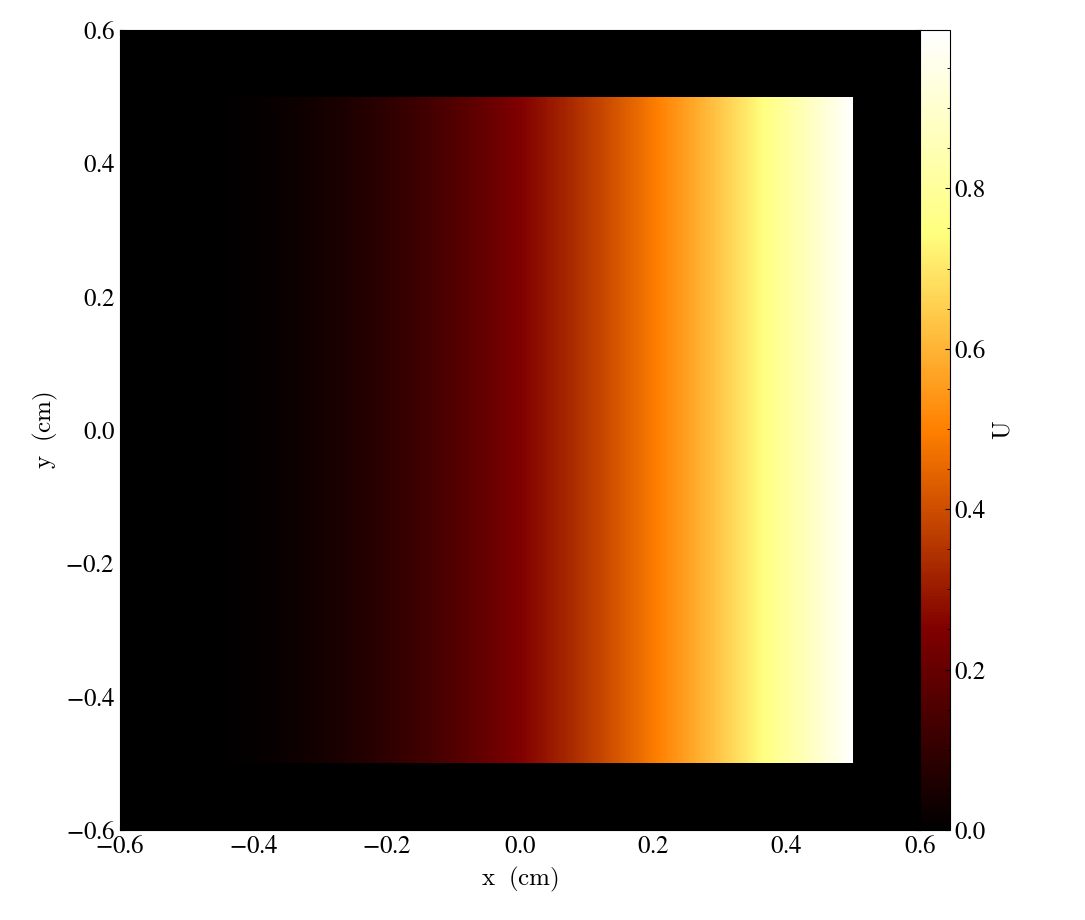

In [10]:
ds = yt.load("quad9_out.e", step=-1)

slc = yt.SlicePlot(ds, 'z', ('all', 'u'))

slc.set_log(('all','u'), False)
slc.set_cmap(('all','u'),'afmhot')
slc.set_background_color(('all','u'), color='white')


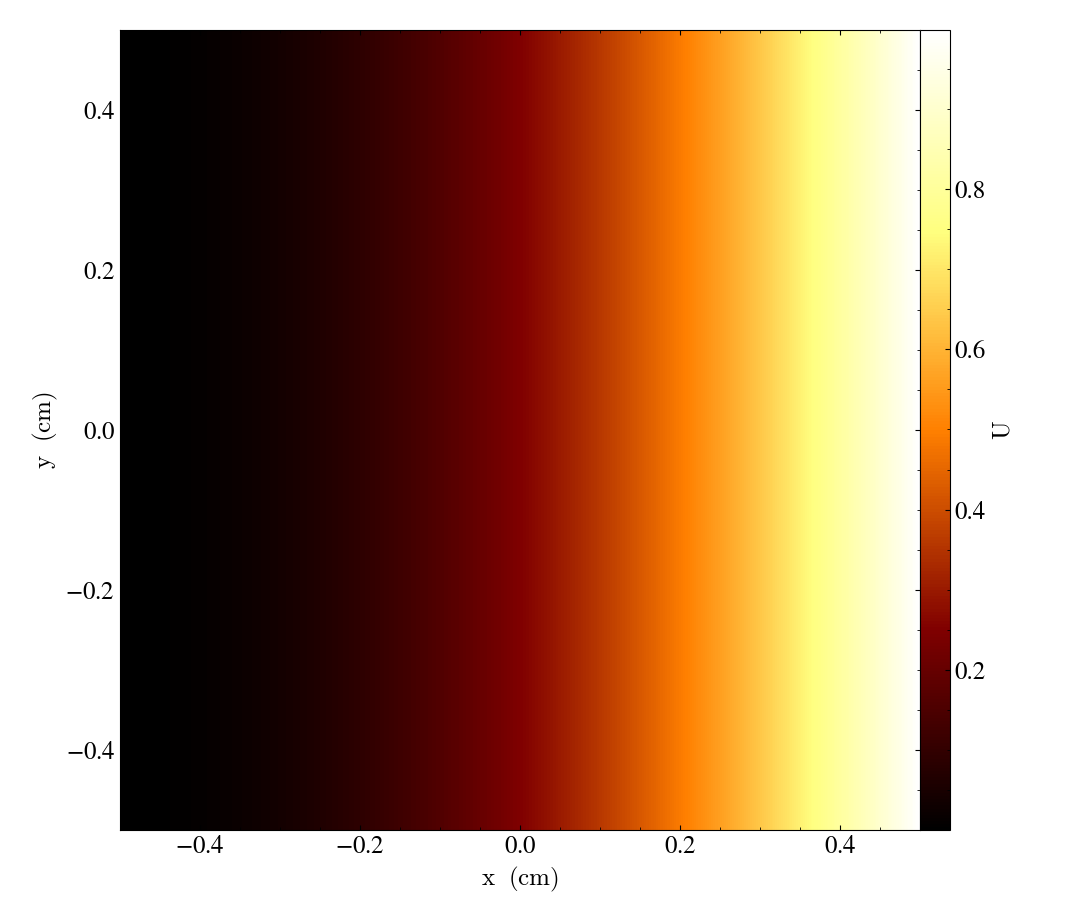

In [22]:
ds = yt.load("quad9_out.e", step=-1)

slc = yt.SlicePlot(ds, 'z', ('all', 'u'))

slc.set_log(('all','u'), False)
slc.set_width((1,1))
slc.set_cmap(('all','u'),'afmhot')

In [19]:
slc.xlim

(-0.10000000000000009 code_length, 1.1 code_length)

In [20]:
dir(slc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axes_unit_names',
 '_callbacks',
 '_cbar_minorticks',
 '_colorbar_label',
 '_colorbar_valid',
 '_colormaps',
 '_current_field',
 '_data_valid',
 '_equivalencies',
 '_field_transform',
 '_font_color',
 '_font_properties',
 '_frb',
 '_frb_generator',
 '_get_axes_labels',
 '_initialize_dataset',
 '_minorticks',
 '_periodic',
 '_plot_type',
 '_plot_valid',
 '_recreate_frb',
 '_repr_html_',
 '_right_handed',
 '_send_zmq',
 '_set_font_properties',
 '_set_window',
 '_setup_origin',
 '_setup_plots',
 '_splat_color',
 '_switch_ds',
 '_xlabel',
 '_ylabel',
 'annotate_arrow',
 'annotate_cell_edges',
 '

In [18]:
help(slc.xlim)

Help on tuple object:

class tuple(object)
 |  tuple() -> empty tuple
 |  tuple(iterable) -> tuple initialized from iterable's items
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(...)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  _


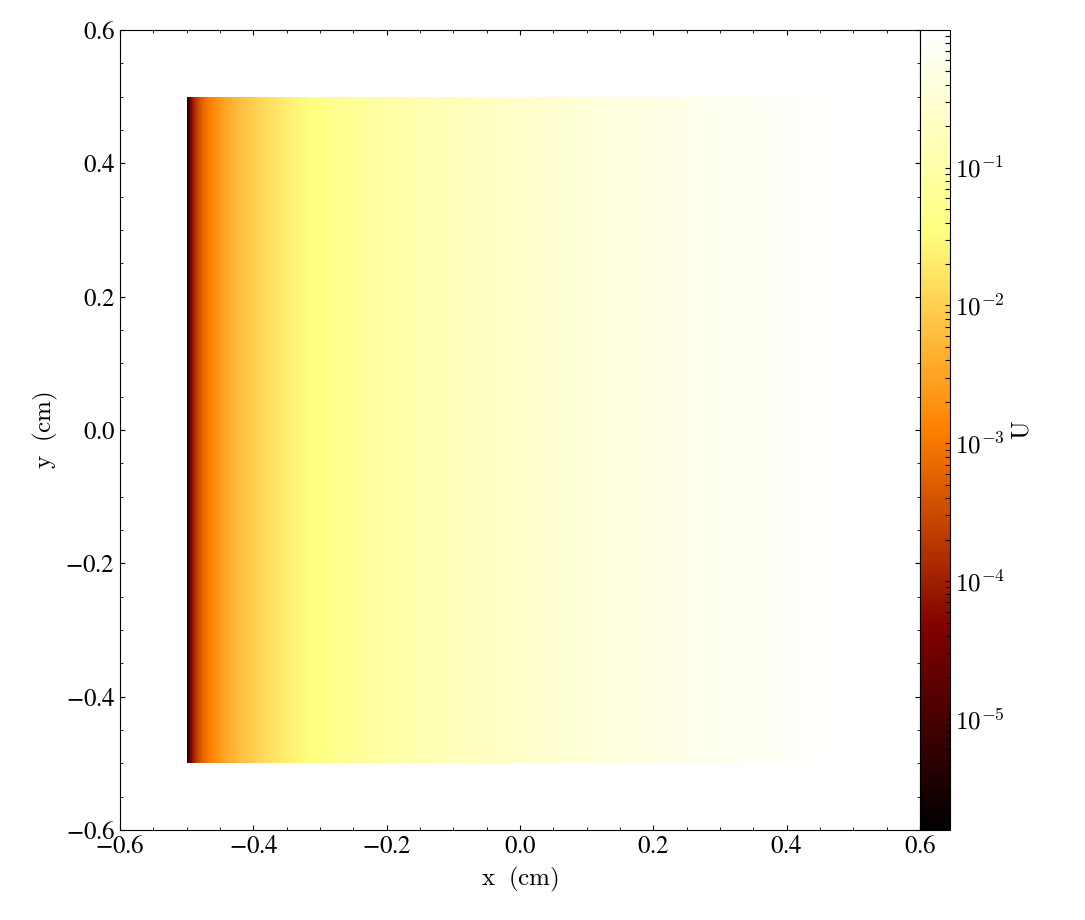

In [14]:
ds = yt.load("quad9_out.e", step=-1)

slc = yt.SlicePlot(ds, 'z', ('all', 'u'))
slc.set_cmap(('all','u'),'afmhot')


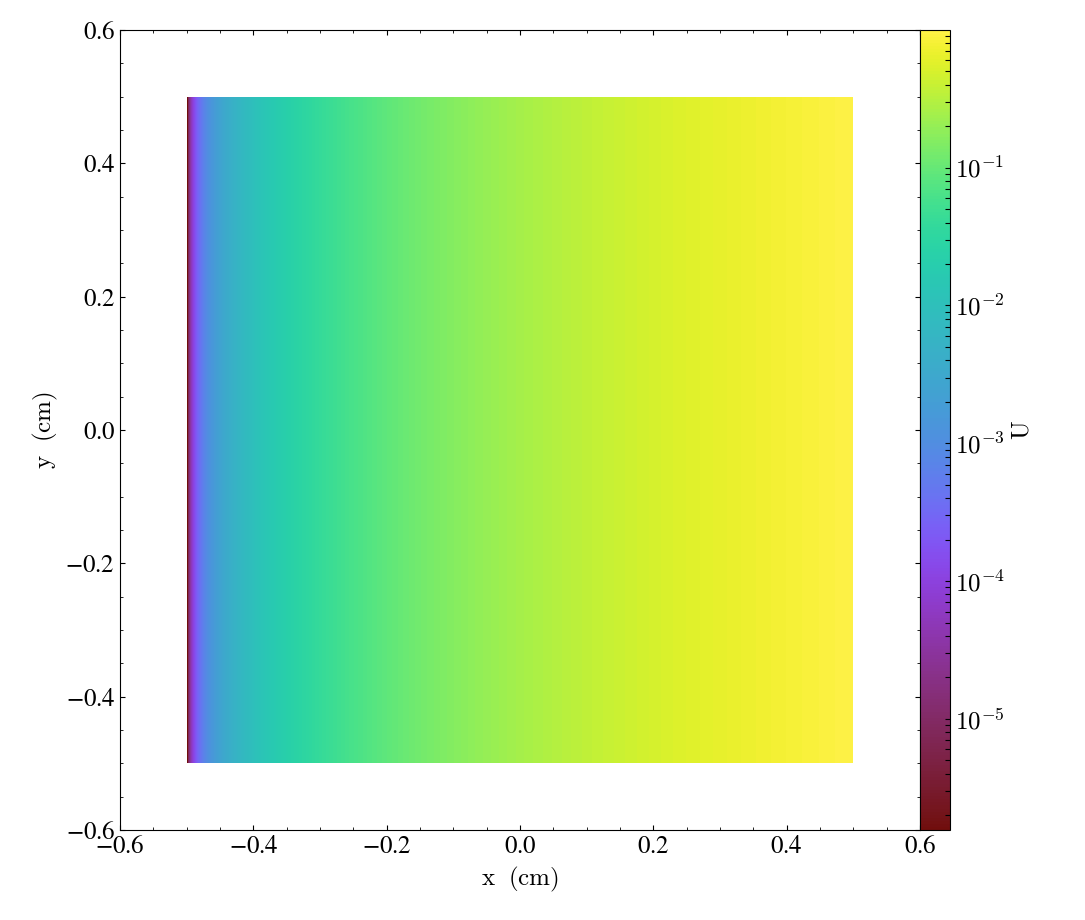

In [13]:
ds = yt.load("quad9_out.e", step=-1)

slc = yt.SlicePlot(ds, 'z', ('all', 'u'))
slc.show()

In [8]:
from sympy import MatrixSymbol, Matrix

In [9]:
X = MatrixSymbol('X', 3, 2)
Matrix(X)

Matrix([
[X[0, 0], X[0, 1]],
[X[1, 0], X[1, 1]],
[X[2, 0], X[2, 1]]])

Before changing maximum iteration number from 10 to 100, total successful maps from real to unit = 5. Afterwards = 6

In [13]:
import numpy as np

In [64]:
def quad9_residual_norm(x, vertices, phys_x):
    if x.size != phys_x.size != 2:
        raise ValueError("x or phys_x not the right length")
    if vertices.size != 18:
        raise ValueError("vertices not the right length")
        
    f0 = abs(-0.5*(1 + x[0])*(-1 + x[0])*x[1]*(-1 + x[1])*vertices[8] - 0.5*(1 + x[0])*(-1 + x[0])*x[1]*(1 + x[1])*vertices[12] + (1 + x[0])*(-1 + x[1])*(1 + x[1])*(-1 + x[1])*vertices[16] - phys_x[0] - 0.5*x[0]*(-1 + x[0])*(1 + x[1])*(-1 + x[1])*vertices[14] + 0.25*x[0]*(-1 + x[0])*x[1]*(-1 + x[1])*vertices[0] + 0.25*x[0]*(-1 + x[0])*x[1]*(1 + x[1])*vertices[6] - 0.5*x[0]*(1 + x[0])*(1 + x[1])*(-1 + x[1])*vertices[10] + 0.25*x[0]*(1 + x[0])*x[1]*(-1 + x[1])*vertices[2] + 0.25*x[0]*(1 + x[0])*x[1]*(1 + x[1])*vertices[4])
    f1 = abs(-0.5*(1 + x[0])*(-1 + x[0])*x[1]*(-1 + x[1])*vertices[9] - 0.5*(1 + x[0])*(-1 + x[0])*x[1]*(1 + x[1])*vertices[13] + (1 + x[0])*(-1 + x[1])*(1 + x[1])*(-1 + x[1])*vertices[17] - phys_x[1] - 0.5*x[0]*(-1 + x[0])*(1 + x[1])*(-1 + x[1])*vertices[15] + 0.25*x[0]*(-1 + x[0])*x[1]*(-1 + x[1])*vertices[1] + 0.25*x[0]*(-1 + x[0])*x[1]*(1 + x[1])*vertices[7] - 0.5*x[0]*(1 + x[0])*(1 + x[1])*(-1 + x[1])*vertices[11] + 0.25*x[0]*(1 + x[0])*x[1]*(-1 + x[1])*vertices[3] + 0.25*x[0]*(1 + x[0])*x[1]*(1 + x[1])*vertices[5])
        
    return max(f0, f1)

In [66]:
phys_x = np.array([2., 1.])
x = np.array([0.3111078176368783, -0.6888921823631216])
print(quad9_residual_norm(x, vertices, phys_x))

5.69401803485e-10


In [65]:
phys_x = np.array([2., 1.])
x = np.array([1., 0.])
print(quad9_residual_norm(x, vertices, phys_x))

2.0


In [ ]:
vertices = np.array([0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1])
phys_x = np.array([2, 0])

In [25]:
x = np.array([1,-1])
print(quad9_residual_norm(x, vertices, phys_x))

0.0


In [26]:
x = np.array([-1.1213203435596428, -3.121320343559641])
print(quad9_residual_norm(x, vertices, phys_x))

1.28757154991e-15


In [24]:
print(quad9_residual_norm(x, vertices, phys_x))

1.28757154991e-15


In [28]:
r = np.arange(-5, 5, .1)
s = np.arange(-5, 5, .1)
r, s = np.meshgrid(r, s)
print(r.shape)

(100, 100)


In [29]:
print(r)
print(s)

[[-5.  -4.9 -4.8 ...,  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...,  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...,  4.7  4.8  4.9]
 ..., 
 [-5.  -4.9 -4.8 ...,  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...,  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...,  4.7  4.8  4.9]]
[[-5.  -5.  -5.  ..., -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ..., -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ..., -4.8 -4.8 -4.8]
 ..., 
 [ 4.7  4.7  4.7 ...,  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...,  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...,  4.9  4.9  4.9]]


In [30]:
z = np.zeros(r.shape)

In [31]:
z.shape

(100, 100)

In [32]:
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        z[i][j] = quad9_residual_norm(np.array([r[i][j], s[i][j]]), vertices, phys_x)

In [33]:
z

array([[    7.21110255,     6.37974921,    18.90849545, ...,
         1876.82485842,  1929.36287805,  1982.57972077],
       [   20.07178198,     7.07248188,     5.66818815, ...,
         1780.79600883,  1830.8385087 ,  1881.5318302 ],
       [   31.90301001,    19.07284244,     6.93397433, ...,
         1687.89484551,  1735.51310214,  1783.75474459],
       ..., 
       [ 1157.48134314,  1116.84814754,  1076.81149669, ...,
            6.7955868 ,    10.66637866,    28.43467708],
       [ 1222.00517071,  1179.2330994 ,  1137.08444187, ...,
           24.52898464,     6.93397433,    11.60893561],
       [ 1288.72392312,  1243.74707488,  1199.4210752 , ...,
           43.91259013,    25.77555577,     7.07248188]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Color plot of the norm of the residual for our transformation of a real point corresponding to node 1 (e.g. [1, -1] in mapped coordinates)

In [59]:
fig = plt.figure()

ax = plt.pcolor(r, s, z, cmap= 'jet', vmin = 0, vmax = 5)

plt.colorbar()
fig.savefig('residual_norm.png')

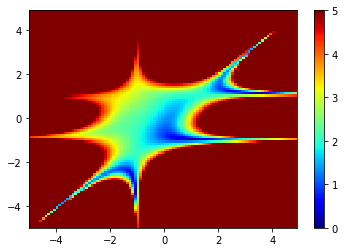

In [58]:
plt.show()

So the true minimizer is at [1, -1], however, one can see how you might end up at a false minimizer like [-1.12, -3.12]

In [60]:
pwd

'/home/lindsayad/projects/moose/modules/navier_stokes/tests/ins/lid_driven/gold'

In [50]:
ax = fig.gca(projection='3d')

surf = ax.plot_surface(r, s, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 10)

# Add a color bar which maps values to colors.
bar = fig.colorbar(surf, shrink=0.5, aspect=5)
bar.vmax = 10
bar.vmin = 0

In [52]:
bar.vmax

10

In [53]:
bar

In [47]:
dir(bar)

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_solids',
 '_boundaries',
 '_central_N',
 '_config_axes',
 '_edges',
 '_extend_lower',
 '_extend_upper',
 '_extended_N',
 '_find_range',
 '_get_extension_lengths',
 '_inside',
 '_label',
 '_labelkw',
 '_locate',
 '_mesh',
 '_outline',
 '_patch_ax',
 '_process_values',
 '_proportional_y',
 '_set_label',
 '_slice_dict',
 '_tick_data_values',
 '_ticker',
 '_uniform_y',
 '_values',
 '_y',
 'add_checker',
 'add_lines',
 'alpha',
 'autoscale',
 'autoscale_None',
 'ax',
 'boundaries',
 'callbacksSM',
 'changed',
 'check_update',
 'cmap',
 'colorbar',
 'config_axis',
 'dividers',
 'draw_all',
 'drawedges',
 'extend',


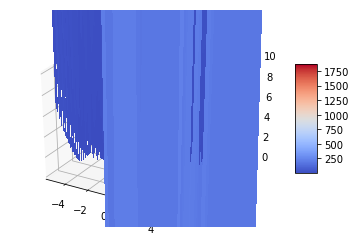

In [51]:
plt.show()

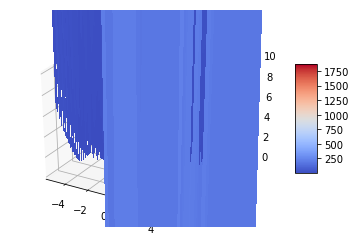

1.8596683060397899e-13

In [36]:
z.min()

In [37]:
z.min()

1.8596683060397899e-13

In [39]:
r[60][40]

-1.0000000000000142

In [40]:
r[0][0]

-5.0

In [41]:
s[0][0]

-5.0

In [42]:
r[60][0]

-5.0

In [43]:
r[40][60]

0.99999999999997868

In [44]:
s[40,60]

-1.0000000000000142

In [45]:
quad9_residual_norm(np.array([r[40][60], s[40][60]]), vertices, phys_x)

1.8596683060397899e-13

# 3/17/17

Below plot is with full second order

In [1]:
cd ~/yt_data/SecondOrderTets/

/home/lindsayad/yt_data/SecondOrderTets



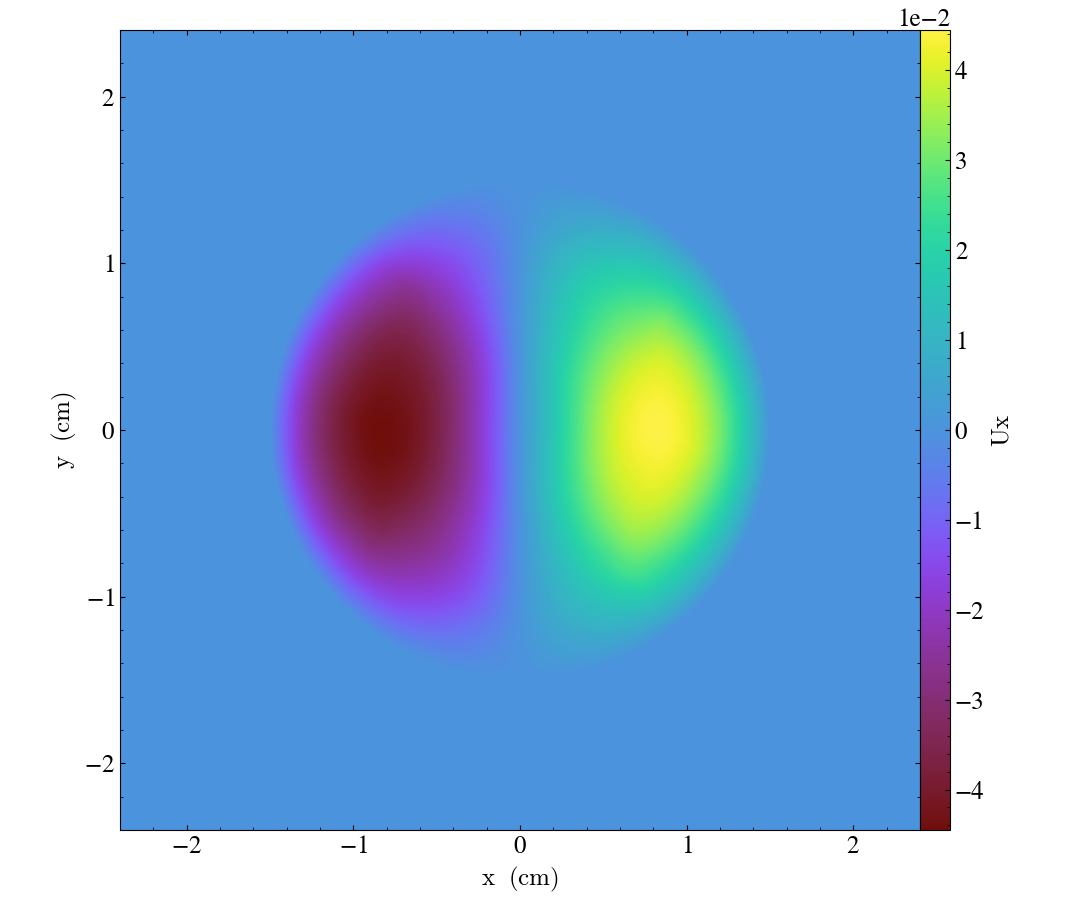

In [2]:
import yt
ds = yt.load("tet10_unstructured_out.e", step=-1)
slc = yt.SlicePlot(ds, 'z', ('all', 'ux'), center=[0,0,1.5])
slc.set_log(('all','ux'), False)

In [1]:
cd ~/yt_data/SecondOrderTets/

/home/lindsayad/yt_data/SecondOrderTets



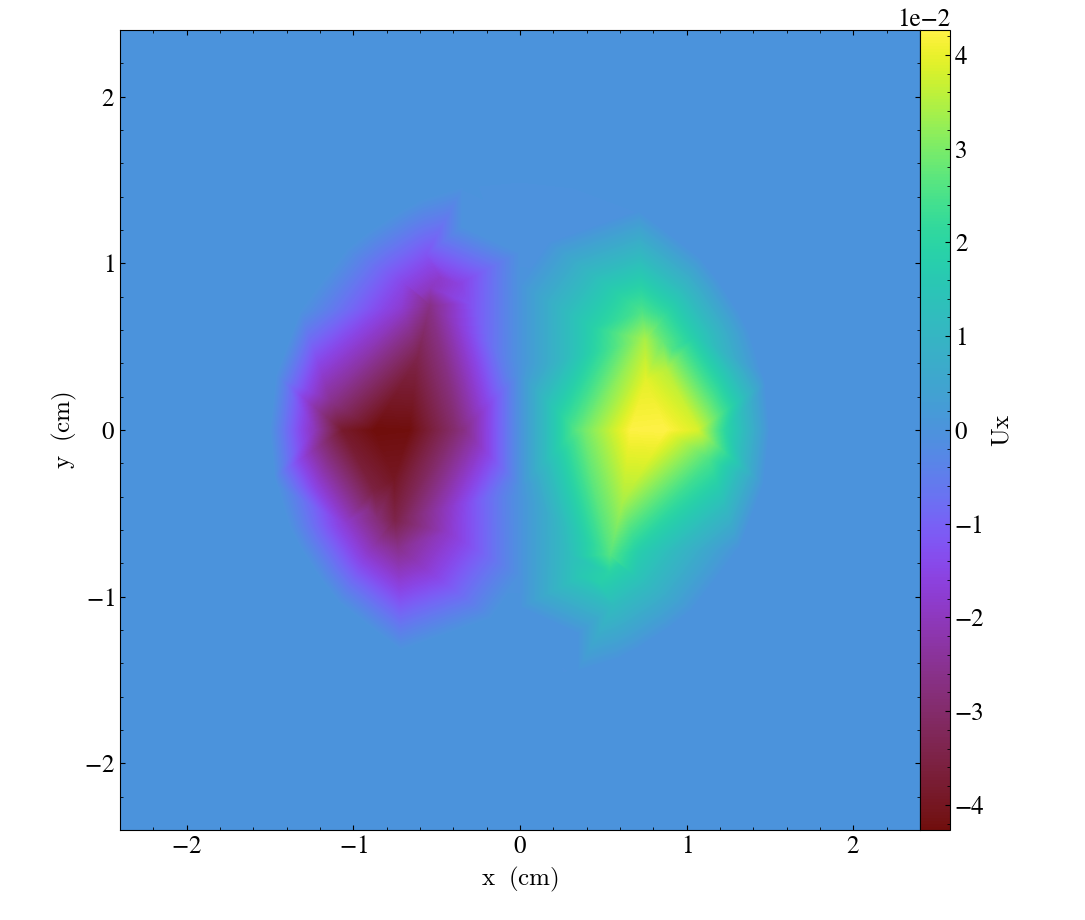

In [2]:
import yt
ds = yt.load("tet10_unstructured_out.e", step=-1)
slc = yt.SlicePlot(ds, 'z', ('all', 'ux'), center=[0,0,1.5])
slc.set_log(('all','ux'), False)

In [ ]:
yt.config.ytcfg["yt", "ray_tracing_engine"] = "yt"

In [1]:
cd ~/yt_data/

/home/lindsayad/yt_data


In [2]:
import yt
from yt.visualization.volume_rendering.api import create_scene

In [3]:
ds = yt.load("SecondOrderTets/tet10_unstructured_out.e", step=-1)
sc = create_scene(ds, ('connect1', 'uz'))

# override the default colormap
ms = sc.get_source(0)
ms.cmap = 'Eos A'
ms.color_bounds = (-.01, .1)

cam = sc.camera

# increase the default resolution
cam.resolution = (800, 800)

# render and save
sc.save('quad9')

In [3]:
im.save('rendered_image_no_linesearch')

In [4]:
cd ..

/home/lindsayad/yt_data


In [5]:
ds = yt.load("MOOSE_sample_data/out.e-s010")

# create a default scene
sc = yt.create_scene(ds, ('connect2', 'diffused'))

# override the default colormap
ms = sc.get_source(0)
ms.cmap = 'Eos A'

# adjust the camera position and orientation
cam = sc.camera
cam.focus = ds.arr([0.0, 0.0, 0.0], 'code_length')
cam_pos = ds.arr([-3.0, 3.0, -3.0], 'code_length')
north_vector = ds.arr([0.0, -1.0, -1.0], 'dimensionless')
cam.set_position(cam_pos, north_vector)

# increase the default resolution
cam.resolution = (800, 800)

# render and save
sc.save()

In [8]:
type(im)

yt.data_objects.image_array.ImageArray

In [9]:
dir(im)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__rdivmod__

In [11]:
help(im.save)

Help on method save in module yt.data_objects.image_array:

save(filename, png=True, hdf5=True) method of yt.data_objects.image_array.ImageArray instance
    Saves ImageArray.
    
    Arguments:
      filename: string
        This should not contain the extension type (.png, .h5, ...)
    
    Optional Arguments:
      png: boolean, default True
        Save to a png
    
      hdf5: boolean, default True
        Save to hdf5 file, including info dictionary as attributes.



I hate answer tests with a burning passion. How can two files diff when they look the exact same? And apparently when the answer files get written during testing, the background takes on the same color as the minimum of the color bar, which is not the same as when I just save from a script or jupyter, where the background is black. What gives???

In [1]:
cd ~/projects/moltres/problems/

/home/lindsayad/projects/moltres/problems


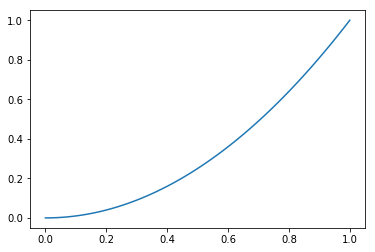

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

ds = yt.load("quad9_out.e", step=-1)

from yt.geometry.coordinates.cartesian_coordinates import CartesianCoordinateHandler

handler = CartesianCoordinateHandler(ds)

arc_length, temp_values = handler.line_plot(('all', 'u'), np.array([0, 0.5, 0.]), np.array([1, 0.5, 0.]), 100)
plt.plot(arc_length, temp_values)
plt.show()

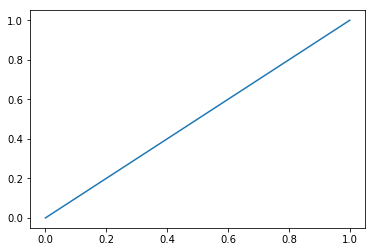

In [2]:
import yt
import numpy as np
import matplotlib.pyplot as plt

ds = yt.load("quad9_out.e", step=-1)

from yt.geometry.coordinates.cartesian_coordinates import CartesianCoordinateHandler

handler = CartesianCoordinateHandler(ds)

arc_length, temp_values = handler.line_plot(('all', 'u'), np.array([0, 0.5, 0.]), np.array([1, 0.5, 0.]), 100)
plt.plot(arc_length, temp_values)
plt.show()

In [1]:
cd ~/projects/moose/modules/navier_stokes/tests/ins/lid_driven/gold/

/home/lindsayad/projects/moose/modules/navier_stokes/tests/ins/lid_driven/gold



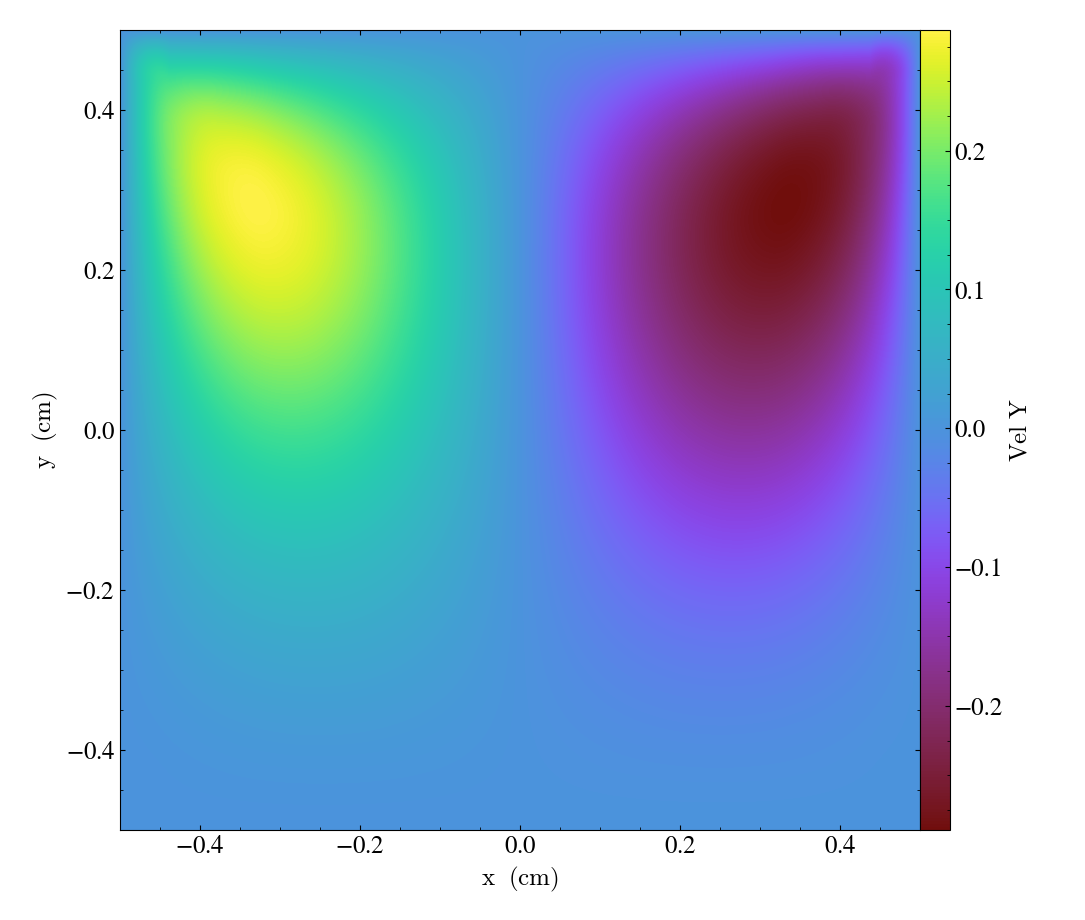

In [2]:
import yt

ds = yt.load("lid_driven_out.e", step=-1)
slc = yt.SlicePlot(ds, 'z', ('connect1', 'vel_y'))
slc.set_log(('connect1','vel_y'), False)
slc.set_width((1, 1))

slc.show()